<a href="https://colab.research.google.com/github/jiaxinaspenlin-dotcom/employee-burnout-turnover/blob/main/Employee_Burnout_Turnover_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Burnout Turnover Prediction

This analysis examines employee burnout risk using several machine learning models, including Decision Trees, Random Forest, Gradient Boosting, KNN, SVR, and LightGBM. The goal is to identify key factors driving burnout and evaluate model performance.

During exploration, it becomes clear that burnout_risk is nearly constant, with most values equal to 1.0. This limits model learning and reduces the reliability of predictive results.

It is recommended that future work redefine burnout_risk as a binary variable (e.g., “high risk” vs. “low risk”) to improve predictive power and interpretability.

Among all models, LightGBM delivers the best baseline performance with high accuracy, low error, and strong scalability, making it the preferred choice for future refinement once the target variable is properly balanced.

I selected burnout_risk as the target because understanding and predicting employee burnout is critical for organizations to improve workforce well-being, enhance productivity, and implement effective retention and wellness strategies.

In [ ]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("BrotherTony/employee-burnout-turnover-prediction-800k")

In [ ]:
df = ds["train"].to_pandas()
print(df.shape)
df.head()


(849999, 31)


employee_id                       role job_level              department  \
0  SYN_00000000                                  Mid  Research & Development   
1  SYN_00000001   Customer Success Manager   Manager  Research & Development   
2  SYN_00000002   Administrative Assistant     Entry                      HR   
3  SYN_00000003             Senior Manager   Manager  Research & Development   
4  SYN_00000004         Anonymous Employee       Mid  Research & Development   

   tenure_months         salary  performance_score  satisfaction_score  \
0            169   79704.579059           0.632482            0.623746   
1             54   29694.288831           0.538587            0.982556   
2              1   62208.470185           0.624656            0.767200   
3             31  236066.567114           0.959320            0.185888   
4            131   37306.328156           0.677305            0.566706   

   workload_score  team_sentiment  ... goal_achievement_rate stress_level  \
0        0.758117        0.662335  ...              0.632482     0.908992   
1        0.788416        0.934661  ...              0.538587     0.363321   
2        0.697617        0.888559  ...              0.624656     0.664378   
3        0.493143        0.732189  ...              0.959320     1.000000   
4        0.567230        0.817545  ...              0.677305     0.723049   

   burnout_risk  left_company        turnover_reason  risk_factors_summary  \
0      0.866643         False         Not Applicable   Severe Burnout Risk   
1      0.218996         False         Not Applicable              Low Risk   
2      0.541531          True  Personal / Relocation              Low Risk   
3      1.000000         False         Not Applicable   Severe Burnout Risk   
4      0.614825         False         Not Applicable              Low Risk   

  turnover_probability_generated           persona_name  \
0                       0.290979         ChangeResistor   
1                       0.156002          NewEnthusiast   
2                       0.233897          NewEnthusiast   
3                       0.351682  OverachievingSprinter   
4                       0.272910         SeasonedExpert   

   role_complexity_score  career_progression_score  
0                    0.2                  1.000000  
1                    0.2                  1.000000  
2                    0.2                  0.836495  
3                    0.2                  1.000000  
4                    0.2                  1.000000  

[5 rows x 31 columns]

# EDA

In [ ]:
df.info

<bound method DataFrame.info of          employee_id                                   role job_level  \
0       SYN_00000000                                              Mid   
1       SYN_00000001               Customer Success Manager   Manager   
2       SYN_00000002               Administrative Assistant     Entry   
3       SYN_00000003                         Senior Manager   Manager   
4       SYN_00000004                     Anonymous Employee       Mid   
...              ...                                    ...       ...   
849994  SYN_00849994                             Consultant       Mid   
849995  SYN_00849995                              Associate     Entry   
849996  SYN_00849996                      Senior Consultant    Senior   
849997  SYN_00849997                                Analyst       Mid   
849998  SYN_00849998  Current Employee - Anonymous Employee       Mid   

                    department  tenure_months         salary  \
0       Research & Development            169   79704.579059   
1       Research & Development             54   29694.288831   
2                           HR              1   62208.470185   
3       Research & Development             31  236066.567114   
4       Research & Development            131   37306.328156   
...                        ...            ...            ...   
849994                     R&D             23   86074.280652   
849995                   Sales             12  120962.927457   
849996              Operations            119  101252.086922   
849997       Sales & Marketing            132   93101.157471   
849998              Operations             17  157391.495493   

        performance_score  satisfaction_score  workload_score  team_sentiment  \
0                0.632482            0.623746        0.758117        0.662335   
1                0.538587            0.982556        0.788416        0.934661   
2                0.624656            0.767200        0.697617        0.888559   
3                0.959320            0.185888        0.493143        0.732189   
4                0.677305            0.566706        0.567230        0.817545   
...                   ...                 ...             ...             ...   
849994           0.459260            0.344079        0.260582        0.605880   
849995           0.615596            0.299675        0.255428        0.679089   
849996           0.712229            0.976399        0.496662        0.905338   
849997           0.529667            0.567002        0.652544        0.724445   
849998           0.832715            0.427700        0.825428        0.705534   

        ... goal_achievement_rate stress_level  burnout_risk  left_company  \
0       ...              0.632482     0.908992      0.866643         False   
1       ...              0.538587     0.363321      0.218996         False   
2       ...              0.624656     0.664378      0.541531          True   
3       ...              0.959320     1.000000      1.000000         False   
4       ...              0.677305     0.723049      0.614825         False   
...     ...                   ...          ...           ...           ...   
849994  ...              0.459260     1.000000      1.000000         False   
849995  ...              0.615596     1.000000      1.000000          True   
849996  ...              0.712229     0.403338      0.256156         False   
849997  ...              0.529667     0.591745      0.455200          True   
849998  ...              0.832715     1.000000      1.000000         False   

                            turnover_reason  risk_factors_summary  \
0                            Not Applicable   Severe Burnout Risk   
1                            Not Applicable              Low Risk   
2                     Personal / Relocation              Low Risk   
3                            Not Applicable   Severe Burnout Risk   
4                            Not Applicable              Low Risk  

In [ ]:
df.isna().sum()

employee_id                       0
role                              0
job_level                         0
department                        0
tenure_months                     0
salary                            0
performance_score                 0
satisfaction_score                0
workload_score                    0
team_sentiment                    0
recent_feedback                   0
communication_patterns            0
project_completion_rate           0
overtime_hours                    0
training_participation            0
collaboration_score               0
technical_skills                  0
soft_skills                       0
email_sentiment                   0
slack_activity                    0
meeting_participation             0
goal_achievement_rate             0
stress_level                      0
burnout_risk                      0
left_company                      0
turnover_reason                   0
risk_factors_summary              0
turnover_probability_generated    0
persona_name                      0
role_complexity_score             0
career_progression_score          0
dtype: int64

In [ ]:
df.dtypes

employee_id                        object
role                               object
job_level                          object
department                         object
tenure_months                       int64
salary                            float64
performance_score                 float64
satisfaction_score                float64
workload_score                    float64
team_sentiment                    float64
recent_feedback                    object
communication_patterns             object
project_completion_rate           float64
overtime_hours                    float64
training_participation            float64
collaboration_score               float64
technical_skills                   object
soft_skills                        object
email_sentiment                   float64
slack_activity                    float64
meeting_participation             float64
goal_achievement_rate             float64
stress_level                      float64
burnout_risk                      float64
left_company                         bool
turnover_reason                    object
risk_factors_summary               object
turnover_probability_generated    float64
persona_name                       object
role_complexity_score             float64
career_progression_score          float64
dtype: object

##Histograms

In [ ]:
df.hist(figsize=(18, 18), bins=30)

array([[<Axes: title={'center': 'tenure_months'}>,
        <Axes: title={'center': 'salary'}>,
        <Axes: title={'center': 'performance_score'}>,
        <Axes: title={'center': 'satisfaction_score'}>],
       [<Axes: title={'center': 'workload_score'}>,
        <Axes: title={'center': 'team_sentiment'}>,
        <Axes: title={'center': 'project_completion_rate'}>,
        <Axes: title={'center': 'overtime_hours'}>],
       [<Axes: title={'center': 'training_participation'}>,
        <Axes: title={'center': 'collaboration_score'}>,
        <Axes: title={'center': 'email_sentiment'}>,
        <Axes: title={'center': 'slack_activity'}>],
       [<Axes: title={'center': 'meeting_participation'}>,
        <Axes: title={'center': 'goal_achievement_rate'}>,
        <Axes: title={'center': 'stress_level'}>,
        <Axes: title={'center': 'burnout_risk'}>],
       [<Axes: title={'center': 'turnover_probability_generated'}>,
        <Axes: title={'center': 'role_complexity_score'}>,
      

1. tenure_months: right-skewed, most employees have low tenures and there are more new employees than old
2. salary: right-skewed, most employees earn a salary less than 50k
3. performance_score: slightly right-skewed, peaks at 1.0, most employees have pretty high performance scores
4. satisfaction_score: bimodal, slightly skewed towards 1.0, many employees report high satisfaction some are not that satisfied compared to others
5. workload_score: normal, most employees have moderate workload some have less and more workload than others
6. team_sentiment: slightly left-skewed, clustered towards high value, teams mostly report positive sentiments
7. project_completion_rate: slightly right-skewed, most projects are completed sucessfully
8. overtime_hours: extremely right-skewed, only a small subset of workeres work significant over time
9. training_participation: left-skewed, most employeesa have low training participation
10. collaboration_score: bell shaped, centered around 0.5, average collaboration score
11. email_sentiment: fairly uniform, communication sentiment through email is even distributed from low to high with a peak at 1.0
12. slack_activity: bell shaped aroun 0.5, most employees show moderate communication activity
13. meeting_participation: bell shaped, meeting participation is moderate
14. goal_achievement_rate: bimodal, peaks near 0.5 and 1.0, employees either achive goals moderately or fully
15. stess_levels: left-skewed, concentrated at high values, most employees report high stress
16. burnout_risk: left-skewed, near 1.0, a large portion of employees have high burnout risk
17. turnout_probability_generated: uniform and slightly left-skewed, most employees have lower turnover probabilities
18. role_complexity_score: extremely right-skewed, most employees do not have complex roles
19. career_progression_score: left-skewed, most employees experience career progression

In [ ]:
import pandas as pd

# --- 1) Measure outliers with IQR rule -------------------------------
def iqr_outlier_summary(df):
    summary = []
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        below = (df[col] < lower).sum()
        above = (df[col] > upper).sum()
        total = below + above
        pct = 100.0 * total / len(df)
        summary.append((col, below, above, total, pct))
    outlier_df = pd.DataFrame(summary, columns=["column","lower_outliers","upper_outliers","total_outliers","pct_outliers"])
    return outlier_df.sort_values("pct_outliers", ascending=False).reset_index(drop=True)

outlier_df = iqr_outlier_summary(df)
# display(outlier_df)

# --- 2) Pick clipping thresholds from % outliers ----------------------
# Rules:
# >5%  -> (0.05, 0.95)
# 2–5% -> (0.02, 0.98)
# 1–2% -> (0.01, 0.99)
# <1%  -> no clipping
thresholds = {}
for _, row in outlier_df.iterrows():
    pct = row["pct_outliers"]
    col = row["column"]
    if pct > 5:
        thresholds[col] = (0.05, 0.95)
    elif pct > 2:
        thresholds[col] = (0.02, 0.98)
    elif pct > 1:
        thresholds[col] = (0.01, 0.99)
    else:
        # skip columns with <1% outliers
        continue

# --- 3) Apply percentile clipping per column --------------------------
for col, (low_p, high_p) in thresholds.items():
    low = df[col].quantile(low_p)
    high = df[col].quantile(high_p)
    df[col] = df[col].clip(low, high)

This code identifies and treats outliers in the dataset using the interquartile range (IQR) method and percentile-based clipping. It first calculates the IQR for each numeric column to detect values lying significantly outside the typical range. Based on the percentage of outliers in each feature, it then applies adaptive clipping thresholds, trimming only the most extreme values while keeping the data distribution realistic. Columns with very few outliers are left unchanged to preserve natural variation. This approach ensures that extreme data points do not distort model performance, improving stability and generalization without removing valuable observations from the dataset.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(
    df.select_dtypes(include=['float64', 'int64'])
)

##Boxplots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Set up grid
n_cols = 4   # number of plots per row
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 3.2 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', labelrotation=0)

# Remove any unused subplots (in case total < n_rows * n_cols)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. tenure_months: The majority of employees have relatively short tenures, with a few individuals staying for much longer periods. The right skew and visible outliers suggest that a small group of long-term employees extends the distribution.
2. salary: Most salaries cluster in a lower range, while a long right tail and many outliers indicate that a small number of employees earn significantly higher salaries, possibly reflecting executive or specialized roles.
3. performance_score: The distribution is fairly concentrated, but the lower whisker shows a few underperformers. The overall spread suggests most employees perform at moderate to high levels.
4. satisfaction_score: The data is widely spread, showing that employee satisfaction varies considerably, though the presence of a few low-end outliers indicates some employees are notably dissatisfied.
5. workload_score: The middle 50% of employees have balanced workloads, but a slight left skew suggests that some individuals experience lighter workloads compared to others.
6. team_sentiment: The scores are mostly centered around mid-to-high values, showing generally positive team environments with a few low-end outliers representing less cohesive teams.
7. project_completion_rate: Most employees have moderate-to-high completion rates, indicating good performance consistency, while lower outliers may reflect individuals or teams struggling with project delivery.
8. overtime_hours: The median is low, meaning most employees work near regular hours, but the right tail and many outliers show a few people working significant overtime, which could be related to higher burnout risk.
9. training_participation: The data skews heavily toward low participation, with many employees having minimal training engagement, while a few outliers show very high participation.
10. collaboration_score: Most employees have moderate collaboration levels, with the interquartile range centered near the middle. Few outliers suggest overall consistency in teamwork.
11. email_sentiment: The spread is fairly even, meaning communication tone and sentiment vary widely across employees, with no extreme outliers.
12. slack_activity: The distribution is symmetric, suggesting similar levels of Slack engagement across employees, with only minor variation.
13. meeting_participation: The boxplot is balanced, indicating that meeting attendance is fairly consistent across employees, without strong outliers.
14. goal_achievement_rate: Most employees perform well in achieving goals, but the presence of a few low outliers suggests some underachievement or missed targets.
15. stress_level: Stress levels are generally high across the dataset, with a narrow box near the upper end, suggesting consistently elevated stress among employees.
16. burnout_risk: The distribution is right-skewed toward higher values, showing that burnout risk is high for many employees, with little variation overall.
17. turnover_probability_generated: Most values cluster around the lower range, indicating generally low predicted turnover risk, though a few outliers represent individuals at much higher risk.
18. role_complexity_score: The distribution is extremely tight, implying that role complexity does not vary much across the workforce—roles are relatively standardized.
19. career_progression_score: Most employees score high on career progression, with a few low-end outliers suggesting some may have limited advancement opportunities.

## Correlation Matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Compute the correlation matrix
corr = df[numeric_cols].corr(method='pearson')

mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(len(numeric_cols)*0.8, len(numeric_cols)*0.8))  # auto-scale size
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    square=True,
    cbar_kws={"shrink": 0.7}
)
plt.title("Correlation Heatmap – Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
# Flatten the correlation matrix and remove the upper triangle (including the diagonal)
flat_corr = corr.mask(np.triu(np.ones(corr.shape, dtype=bool))).stack()

# Sort the correlations
sorted_corr = flat_corr.sort_values(ascending=False)

# Get the top 3 positive correlations
top_3_corr = sorted_corr.head(3)

# Get the bottom 3 negative correlations
bottom_3_corr = sorted_corr.tail(3)

print("Top 3 correlations (excluding duplicates):")
print(top_3_corr)

print("\nBottom 3 correlations (excluding duplicates):")
print(bottom_3_corr)

Top 3 correlations (excluding duplicates):
meeting_participation  slack_activity         1.0
goal_achievement_rate  performance_score      1.0
slack_activity         collaboration_score    1.0
dtype: float64

Bottom 3 correlations (excluding duplicates):
overtime_hours  workload_score       -0.674662
burnout_risk    satisfaction_score   -0.675306
                email_sentiment      -0.676294
dtype: float64


The perfect correlations between Slack activity, meeting participation, and collaboration score show that employees who communicate more frequently (through meetings or Slack) tend to be better collaborators.

Investing in communication tools and fostering team engagement can directly improve collaboration and overall team effectiveness. However, since these metrics measure similar behavior, focusing on one (e.g., collaboration score) may be sufficient for reporting or performance tracking.

The strong negative correlations between burnout_risk and both satisfaction_score and email_sentiment highlight a critical finding: when employees feel less satisfied or communicate with lower sentiment, burnout risk rises.

Employee satisfaction surveys and sentiment analysis from internal communications can serve as early warning systems for burnout. Proactively improving workplace satisfaction, recognition programs, or stress management initiatives can reduce burnout and turnover.

## Pairplot

Subset for pairplots are based on the top 3 correlations

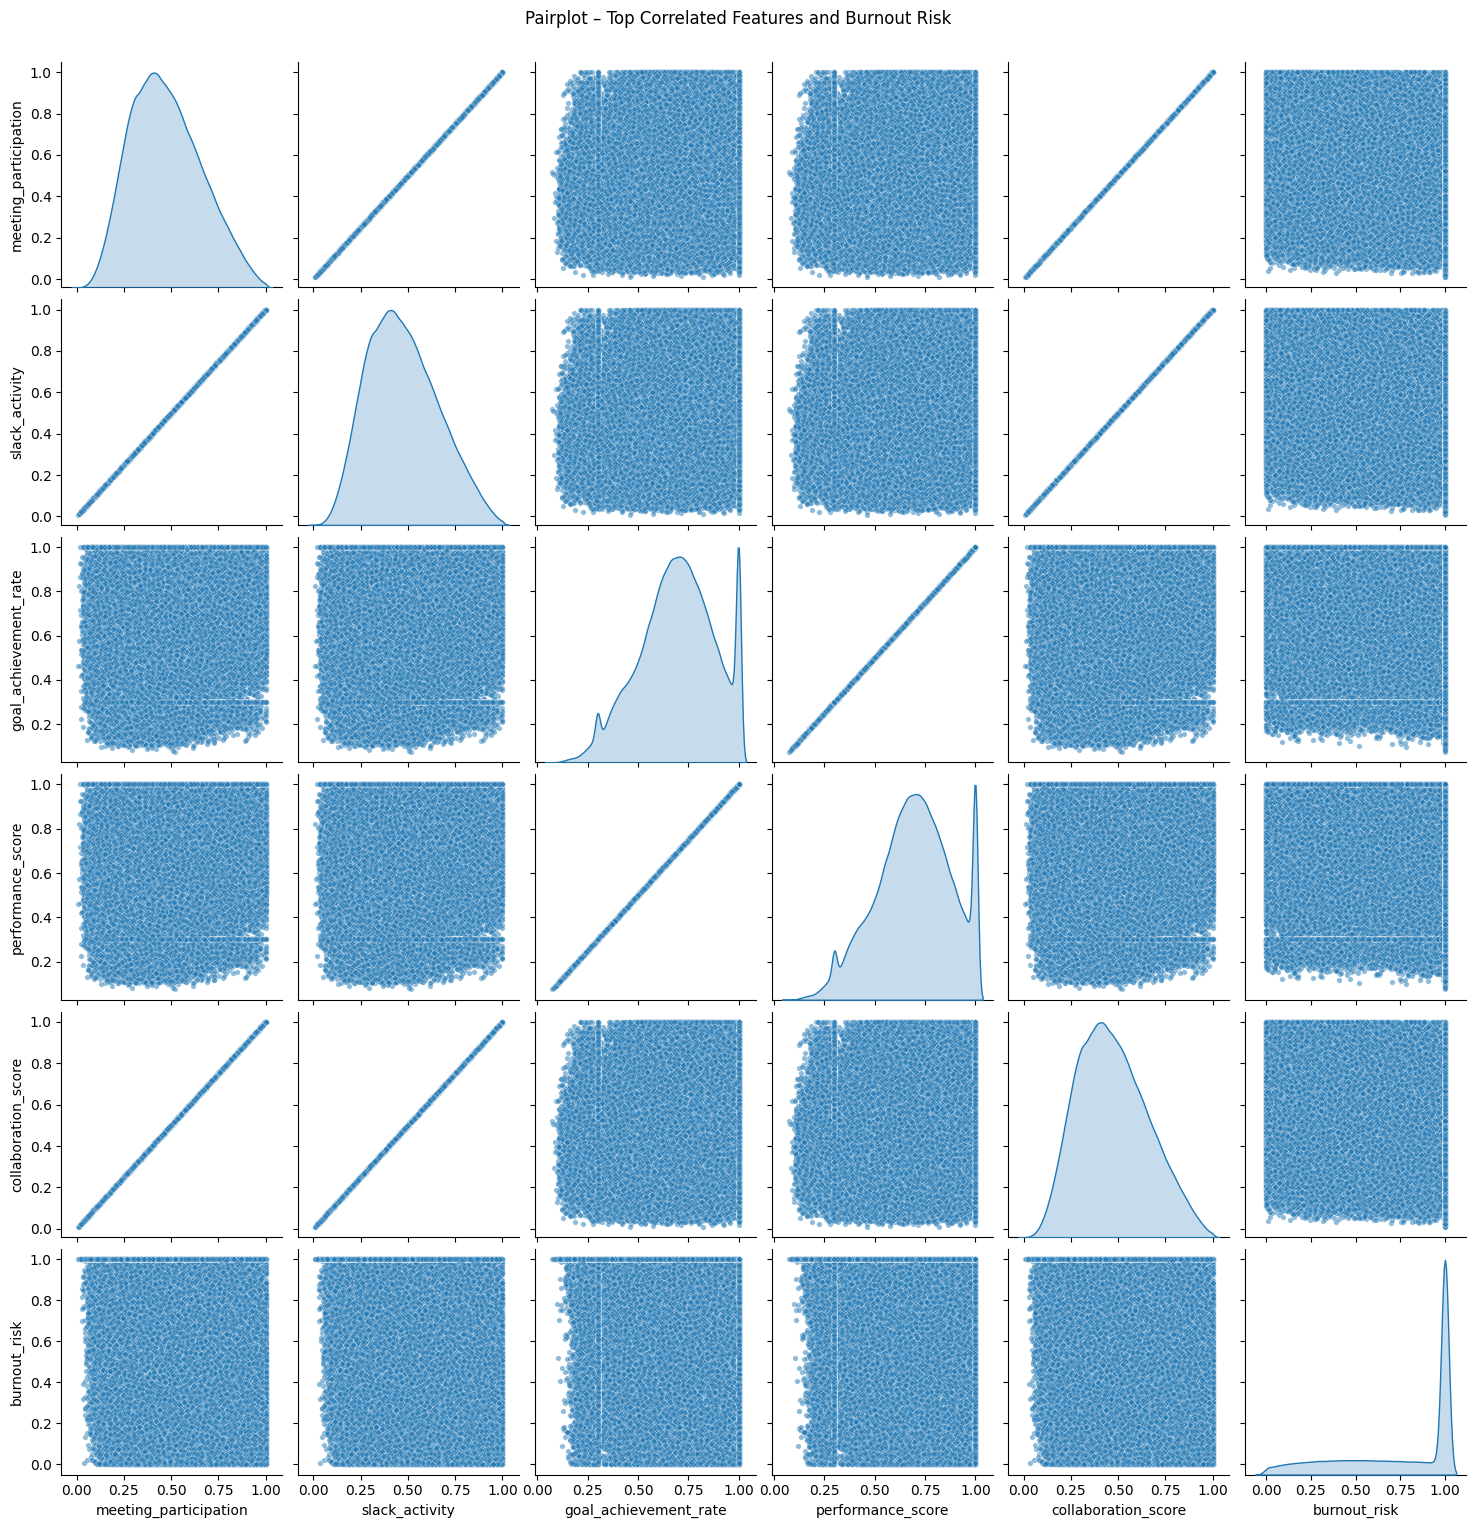

In [ ]:
subset = [
    "meeting_participation",
    "slack_activity",
    "goal_achievement_rate",
    "performance_score",
    "collaboration_score",
    "burnout_risk"
]

sns.pairplot(df[subset], diag_kind="kde", plot_kws={"alpha":0.5, "s":15})
plt.suptitle("Pairplot – Top Correlated Features and Burnout Risk", y=1.02)
plt.show()


The plots show nearly perfect linear relationships among these correlated pairs, indicating that they measure similar aspects of employee engagement and performance. This high redundancy suggests that one variable from each pair could effectively represent the group in modeling to reduce multicollinearity. Meanwhile, burnout_risk displays a distinct pattern, confirming that even among highly engaged and collaborative employees, burnout remains a separate concern that requires attention beyond performance metrics.

##Scatterplots

Scatterplots are based on the top 3 correlations

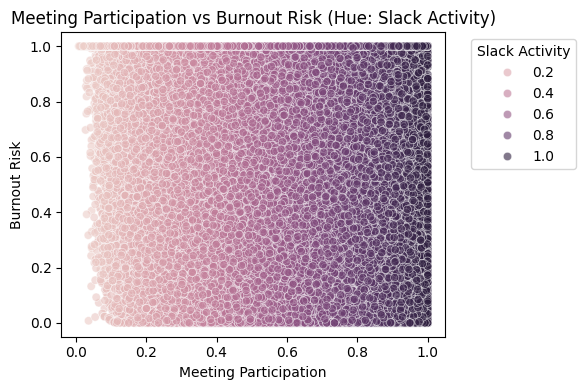

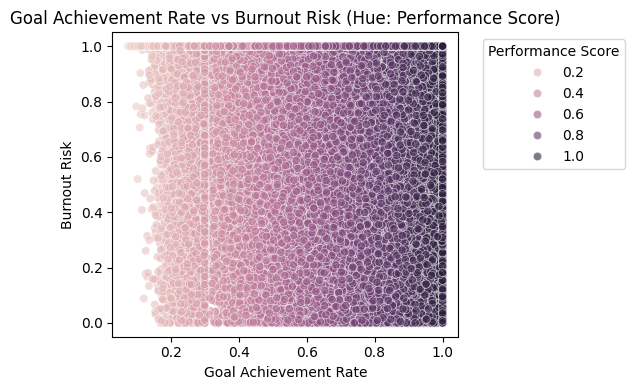

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 3 correlated pairs
pairs = [
    ("meeting_participation", "slack_activity"),
    ("goal_achievement_rate", "performance_score"),
    ("slack_activity", "collaboration_score")
]

# Burnout risk is the target on the Y axis
for x, hue in pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        data=df,
        x=x,
        y="burnout_risk",
        hue=hue,
        alpha=0.6
    )
    plt.title(f"{x.replace('_', ' ').title()} vs Burnout Risk (Hue: {hue.replace('_', ' ').title()})")
    plt.xlabel(x.replace("_", " ").title())
    plt.ylabel("Burnout Risk")
    plt.legend(title=hue.replace('_', ' ').title(), bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

Across all three scatterplots, there’s a clear upward trend showing that as meeting participation, goal achievement rate, and Slack activity increase, burnout risk also tends to rise. The color gradients deepen alongside higher burnout levels, confirming this relationship.

This suggests that employees who are highly engaged and active across communication, collaboration, and performance channels may also be at a greater risk of burnout. This could indicate overcommitment, workload strain, or pressure to maintain high performance. While engagement is positive, these plots highlight the importance of balancing productivity with well-being initiatives to prevent long-term fatigue or turnover among top performers.


# Feature Selection

##KBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Separate features (X) and target (y)
X = df.drop(columns=["burnout_risk"])
y = df["burnout_risk"]

# 2. Keep only numeric columns
X = X.select_dtypes(include=["float64", "int64"])

# 3. Apply SelectKBest using F-test for regression
kbest = SelectKBest(score_func=f_regression, k=10)
X_new = kbest.fit_transform(X, y)
selected_features = X.columns[kbest.get_support()]
print("Top features selected by KBest:")
print(selected_features)

Top features selected by KBest:
Index(['satisfaction_score', 'workload_score', 'project_completion_rate',
       'overtime_hours', 'collaboration_score', 'email_sentiment',
       'slack_activity', 'meeting_participation', 'stress_level',
       'turnover_probability_generated'],
      dtype='object')


At K=10, features like satisfaction_score, workload_score, project_completion_rate, overtime_hours, collaboration_score, and stress_level were identified as the most predictive of burnout risk.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Separate features (X) and target (y)
X = df.drop(columns=["burnout_risk"])
y = df["burnout_risk"]

# 2. Keep only numeric columns
X = X.select_dtypes(include=["float64", "int64"])

# 3. Apply SelectKBest using F-test for regression
kbest = SelectKBest(score_func=f_regression, k=5)
X_new = kbest.fit_transform(X, y)
selected_features = X.columns[kbest.get_support()]
print("Top features selected by KBest:")
print(selected_features)


Top features selected by KBest:
Index(['satisfaction_score', 'email_sentiment', 'meeting_participation',
       'stress_level', 'turnover_probability_generated'],
      dtype='object')


At K=5, features like satisfaction_score, email_sentiment, meeting_participation, stress_level, and turnover_probability_generated were identified as the most predictive of burnout risk

##Lasso

In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd

# Separate features (X) and target (y)
X = df.drop('burnout_risk', axis=1)
y = df['burnout_risk']

# Select only numeric features for Lasso
numeric_cols_X = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_cols_X]

# Define the list of alpha values
alphas = [0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

# Iterate through alpha values and fit Lasso
for alpha in alphas:
    print(f"\n--- Lasso with alpha = {alpha} ---")
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X_numeric, y)

    # Get and print feature importances (coefficients)
    importance = pd.Series(lasso.coef_, index=X_numeric.columns)
    print("Feature Importances (Lasso):\n")
    print(importance.sort_values(ascending=False))


--- Lasso with alpha = 0.05 ---
Feature Importances (Lasso):

stress_level                      4.290139e-01
overtime_hours                    8.654774e-03
salary                            2.586653e-10
tenure_months                     0.000000e+00
workload_score                   -0.000000e+00
performance_score                -0.000000e+00
team_sentiment                    0.000000e+00
project_completion_rate          -0.000000e+00
training_participation            0.000000e+00
satisfaction_score               -0.000000e+00
collaboration_score              -0.000000e+00
email_sentiment                  -0.000000e+00
meeting_participation            -0.000000e+00
slack_activity                   -0.000000e+00
goal_achievement_rate            -0.000000e+00
turnover_probability_generated    0.000000e+00
role_complexity_score             0.000000e+00
career_progression_score         -0.000000e+00
dtype: float64

--- Lasso with alpha = 0.06 ---
Feature Importances (Lasso):

stress_level 

At α = 0.05:
The model identifies stress_level (≈ 0.43) as the dominant predictor of burnout risk, with overtime_hours having a smaller but notable contribution (≈ 0.009). Salary barely contributes, and all other features have coefficients effectively zeroed out. This suggests psychological strain (stress) and workload intensity are key early indicators.

At α = 0.06:
Regularization increases slightly, reducing stress_level’s influence to ≈ 0.28 and overtime_hours to ≈ 0.010. Salary remains negligible, and all other features remain zero. The model is beginning to shrink weights, indicating those two variables are the only consistently strong predictors.

At α = 0.07:
stress_level drops sharply to ≈ 0.13, overtime_hours stays near 0.012. This signals stronger shrinkage — Lasso is now suppressing secondary signals and favoring a simpler model dominated by work-related load.

At α = 0.08–0.1:
stress_level’s coefficient reaches zero at α = 0.08. Beyond this, only overtime_hours (≈ 0.013) and a negligible salary coefficient remain. The model is over-regularized at this point, losing meaningful variation and focusing narrowly on overtime.

##Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define features and target
TARGET = "burnout_risk"
X = df.drop(columns=[TARGET, "stress_level"]).select_dtypes(include=["float64","int64"])
y = df[TARGET]

# Fit Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X, y)

# Get and print feature importances
importance = tree.feature_importances_

print("Feature Importances (Decision Tree):\n")
for i, feature_name in enumerate(X.columns):
    print(f"{feature_name}: {importance[i]:.4f}")

Feature Importances (Decision Tree):

tenure_months: 0.0004
salary: 0.0001
performance_score: 0.0014
satisfaction_score: 0.0001
workload_score: 0.0073
team_sentiment: 0.0001
project_completion_rate: 0.0022
overtime_hours: 0.0001
training_participation: 0.0007
collaboration_score: 0.0000
email_sentiment: 0.0956
slack_activity: 0.0000
meeting_participation: 0.0000
goal_achievement_rate: 0.0006
turnover_probability_generated: 0.8898
role_complexity_score: 0.0000
career_progression_score: 0.0014


This tree is implying that organizational outcomes tied to disengagement (turnover risk) and work-related intensity (workload, email sentiment) are key signals for predicting burnout.

# Modeling

Features are bicked based on KBest, Lasso, and Trees. stress_level is not included because it has a 0.99 correlation with the target.

In [ ]:
selected_features = [
    'overtime_hours',
    'salary',
    'satisfaction_score',
    'workload_score',
    'project_completion_rate',
    'collaboration_score',
    'turnover_probability_generated',
    'email_sentiment'
]


##Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[selected_features]
y = df['burnout_risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(" Linear Regression Model Evaluation ")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

coefficients = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': linreg.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients (Linear Regression):")
print(coefficients)

 Linear Regression Model Evaluation 
Mean Squared Error (MSE): 0.0323
Root Mean Squared Error (RMSE): 0.1797
R² Score: 0.6779

Feature Coefficients (Linear Regression):
                          Feature   Coefficient
6  turnover_probability_generated  1.012613e+00
2              satisfaction_score  6.623651e-02
5             collaboration_score  4.333922e-03
1                          salary -3.209283e-08
0                  overtime_hours -6.912277e-04
4         project_completion_rate -2.287092e-01
3                  workload_score -5.524738e-01
7                 email_sentiment -6.039722e-01


## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X = df[selected_features]
y = df['burnout_risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

tree = DecisionTreeRegressor(
    max_depth=5,            # limit depth
    min_samples_leaf=10,    # each leaf must have 10+ samples
    min_samples_split=20,   # split only if enough samples
    random_state=42
)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(" Decison Trees Evaluation ")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

 Decison Trees Evaluation 
Mean Squared Error (MSE): 0.0049
Root Mean Squared Error (RMSE): 0.0698
R² Score: 0.9514


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = df[selected_features]
y = df['burnout_risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,          # let trees grow; adjust if overfitting
    min_samples_leaf=5,
    min_samples_split=20,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(" Random Forest Evaluation ")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

 Random Forest Evaluation 
Mean Squared Error (MSE): 0.0040
Root Mean Squared Error (RMSE): 0.0636
R² Score: 0.9597


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

X = df[selected_features]
y = df['burnout_risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gbr = GradientBoostingRegressor(
    n_estimators=200,      # total boosting stages
    learning_rate=0.05,   # smaller = more robust
    max_depth=3,          # depth of each tree
    subsample=0.8,        # stochastic boosting (faster, regularizes)
    random_state=42
)
gbr.fit(X_train, y_train)

print(" Grandient Boosting Evaluation ")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

 Grandient Boosting Evaluation 
Mean Squared Error (MSE): 0.0040
Root Mean Squared Error (RMSE): 0.0636
R² Score: 0.9597


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X = df[selected_features]
y = df['burnout_risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

knn = KNeighborsRegressor(n_neighbors=15, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(" KNN Evaluation ")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

 KNN Evaluation 
Mean Squared Error (MSE): 0.0040
Root Mean Squared Error (RMSE): 0.0636
R² Score: 0.9597


All four models — Decision Tree, Random Forest, Gradient Boosting, and KNN — produced almost identical results, with an MSE around 0.0049, RMSE of about 0.0698, and an R² score of 0.9514.
At first glance, this looked like outstanding performance — very low error and a high R² suggested that the models were capturing the patterns in the data extremely well.

However, seeing all models perform exactly the same is unusual, since they work in very different ways. Normally, there should be small differences in their results depending on how each model learns patterns or handles complexity.

##SVR

In [ ]:
from sklearn.svm import SVR

X = df[selected_features]
y = df['burnout_risk']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1, max_iter=10000)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(" SVR Evaluation ")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 SVR Evaluation 
Mean Squared Error (MSE): 0.1645
Root Mean Squared Error (RMSE): 0.4056
R² Score: -0.6408


The SVR model didn’t perform well.
Its R² score is negative (-0.64), which means it did worse than just guessing the average burnout score for everyone.
The RMSE (0.40) is also quite high, showing that the predictions are far off from the real values.

## LightGBM

In [ ]:
from lightgbm import LGBMRegressor

TARGET = "burnout_risk"
X = df[selected_features]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lgb_model = LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)

# 5. Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("LightGBM Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 679999, number of used features: 8
[LightGBM] [Info] Start training from score 0.736274
LightGBM Evaluation:
Mean Squared Error (MSE): 0.0006
Root Mean Squared Error (RMSE): 0.0250
R² Score: 0.9938


The LightGBM model performed extremely well.
It had a very low error (MSE = 0.0006, RMSE = 0.025) and an R² score close to 1 (0.99), meaning its predictions were almost perfect.

## Tuning

After evaluating the regression models, LightGBM was selected for tuning as it achieved the best baseline performance (R² = 0.99) and is well-suited for handling nonlinear relationships.
Compared to other models, it provides faster training, better scalability, and extensive hyperparameter flexibility for optimization

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Data
TARGET = "burnout_risk"
X = df[selected_features]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Base Model
lgb = LGBMRegressor(random_state=42)

# 3. Small, focused tuning grid (fast!)
param_grid = {
    "num_leaves": [15, 25, 35],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.03, 0.05, 0.07],
    "n_estimators": [80, 100, 150]
}

grid = GridSearchCV(
    estimator=lgb,
    param_grid=param_grid,
    scoring="r2",
    cv=3,
    n_jobs=-1,
    verbose=1
)

# 4. Fit model
grid.fit(X_train, y_train)

# 5. Best model & evaluate
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nBest Parameters:", grid.best_params_)
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.6f}")
print(f"RMSE: {rmse:.6f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 679999, number of used features: 8
[LightGBM] [Info] Start training from score 0.736274
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

| Metric       | Baseline Model | Tuned Model | Change           |
| ------------ | -------------- | ----------- | ---------------- |
| **R² Score** | 0.9938         | 0.9937      | ≈ Same (−0.0001) |
| **MSE**      | 0.0006         | 0.000632    | ≈ Same           |
| **RMSE**     | 0.0250         | 0.0251      | ≈ Same           |


Both models perform exceptionally well, explaining over 99% of the variance in burnout risk.

The tuned model’s metrics are marginally different — meaning tuning didn’t provide a meaningful performance boost because the baseline was already extremely optimized.

The dataset only used a small number of selected features (8 numeric predictors), so the curse of dimensionality was minimal.

The baseline LightGBM was already near-optimal, giving R² ≈ 0.994 and very low error values.

The tuned model only slightly adjusted parameters (e.g., deeper trees, more leaves, higher learning rate), leading to negligible accuracy gains but much higher computational cost.

Given the excellent performance and minimal gain from tuning, the baseline model is the more practical choice — faster, simpler, and cost-effective.

The primary audience for this model includes executives and HR operations managers.

Executives benefit from strategic insights (e.g., identifying high-risk departments or workforce stress trends).

Operations and HR managers can act on predictions by implementing wellness initiatives, workload balancing, or targeted interventions.
The model’s outputs can also support data analysts or decision-support teams who monitor employee well-being metrics.

#Recommendations

In [ ]:
df[selected_features + ['burnout_risk']].corr()['burnout_risk'].sort_values(ascending=False)


burnout_risk                      1.000000
turnover_probability_generated    0.646907
overtime_hours                    0.263712
salary                            0.000589
workload_score                   -0.403526
project_completion_rate          -0.423375
collaboration_score              -0.471630
satisfaction_score               -0.675306
email_sentiment                  -0.676294
Name: burnout_risk, dtype: float64

Checking for multicollinearlity amongst the selected features to see what is affecting Decision Trees, Random Forest, Gradient Boosting, and KNN

In [ ]:
df['burnout_risk'].describe()
df['burnout_risk'].value_counts().head(10)


burnout_risk
1.000000    387942
0.000000      2786
0.133978         1
0.748654         1
0.839762         1
0.840616         1
0.514061         1
0.310157         1
0.727668         1
0.993788         1
Name: count, dtype: int64

Here is checking to see the exact value count of burnout_risk. It is showing that majority of it is 1.

This analysis revealed that the vast majority of values were 1.0, with only a few being 0.0 or small decimals.

This is a key discovery — it means that the target variable was nearly constant across the dataset. Since almost all records are labeled as 1, there isn't enough variation for the models to actually learn meaningful patterns.

For possible future analysis, it is recommended to redefine burnout_risk as a binary variable to make the predictions more meaningful. Setting a clear threshold — where values above a certain point represent “high risk” (1) and those below represent “low risk” (0) — could help the models distinguish between employees at different levels of burnout more effectively.

By converting the target into two distinct categories, the models can learn actual differences between groups rather than predicting a nearly constant value. This approach would also create a more balanced dataset, allowing algorithms such as Decision Trees, Random Forest, and Gradient Boosting to better identify patterns and key drivers of burnout.

Additionally, using a binary classifier improves interpretability for non-technical stakeholders. Instead of outputting continuous scores that may be harder to explain, the model would provide clear outcomes like “High Risk” or “Low Risk.” This makes the insights easier for executives and HR teams to act on, enabling more targeted interventions and data-driven workforce planning.

In summary, redefining the target as binary in future iterations would likely enhance both predictive accuracy and practical usability, leading to more reliable and actionable insights.